# Fake news Detection

In [3]:
import pandas as pd 
# read csv from the DATA file
df = pd.read_csv("./Data/news-dataSet.csv")

# Show CSV head
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#show csv shape
df.shape

(6335, 4)

In [6]:
# show csv columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
# show Empty values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
# rename column "Unnamed: 0" to "reference"
df.columns = df.columns.str.replace('Unnamed: 0', 'reference')
df.columns

Index(['reference', 'title', 'text', 'label'], dtype='object')

<AxesSubplot:>

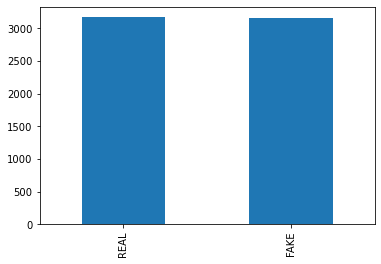

In [29]:
import matplotlib.pyplot as plt

# Count number of FAKE and REAL news
df.label.value_counts().plot.bar()


TODO:
- Création d'une fonction qui convertit tout le texte en miniscule
- Création d'une fonction qui supprime les espaces en plus et les caractéres speciaux 
- but: avoir une données propre pour notre traitement